# Assignment 2: Regression and classification
## DAT405 Introduction to Data Science and AI
### By Pauline Nässlander and Albin Ekström
Hours spent on the assignment:
* Pauline Nässlander: 8 hours
* Albin Ekström: 8 hours

## Question 1 solved by using scikitlearn method for lnear regression

In [1]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd  

In [3]:
hp = pd.read_csv(r'huspriser.csv')

# series to arrays
x = hp['yta'].array
y = hp['pris'].array

# from 1D to 2D matrix
X = x[:, np.newaxis] 

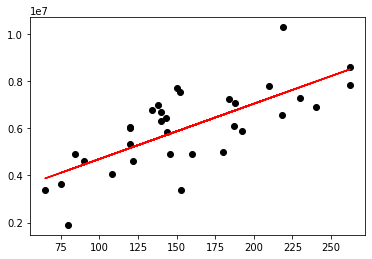

In [4]:
model = LinearRegression().fit(X, y)
y_pred = model.predict(X)

plt.scatter(x, y, color='black')
plt.plot(x, y_pred,color='red')
plt.show()

## i. What are the values of the slope and intercept of the regression line?
Answer:

In [5]:
print("Slope: ", int(model.coef_))
print("Intercept: ", int(model.intercept_))

Slope:  23500
Intercept:  2350910


In [6]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y, y_pred)

951521.4895320581

## ii. Use this model to predict the selling prices of houses which have living area for 100 m2, 150 m2 and 200 m2.
Answer:

In [7]:
print("Price guess for 100 m^2: ", int(model.predict([[100]])), "kr")
print("Price guess for 150 m^2: ", int(model.predict([[150]])), "kr")
print("Price guess for 200 m^2: ", int(model.predict([[200]])), "kr")

Price guess for 100 m^2:  4700929 kr
Price guess for 150 m^2:  5875938 kr
Price guess for 200 m^2:  7050947 kr


## iii. Draw a residual plot.
Answer:

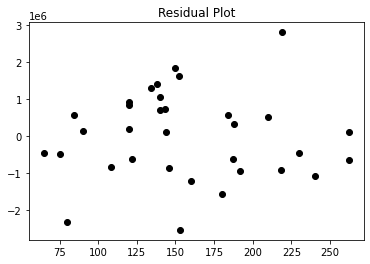

In [8]:
residuals = y-y_pred
plt.plot(X,residuals, 'o', color='black')
plt.title("Residual Plot")
plt.show()

## iv. Discuss the results, and how the model could be improved.
If we use the scikitlearn linear regression model the absolute error becomes significantly smaller compared to our own model (which can be found in a seperate file called "villas_prices"). If we look at the residual plot we can se that the points are balanced around the linear model but quite scattered. The conclution to be drawn from this is that linear regression is a good model for this data but not a great one. To make a model that more precisely predicts the selling price more data should probably be collected. Also more parameters than only living area, as for example total area or house location, should be taken into account.


## Question 2 

In [9]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt

In [10]:
iris = load_iris() #load the iris dataset

#split the dataset into training and testing data. 
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25, random_state=0)

#create a logistic Regression model with the one-vs-rest option and fit it to the training data.
logistic_regr = LogisticRegression(multi_class='ovr')
logistic_regr.fit(x_train,y_train)

predictions = logistic_regr.predict(x_test) #make predictions from the testing data that will be compared to the actual target values
score = logistic_regr.score(x_test, y_test) #generate an accuracy score based on the testing data


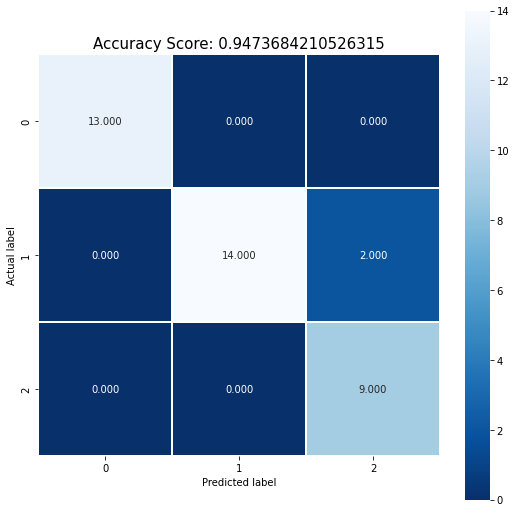

In [11]:
#generate a confusion matrix and plot it
conf_mat = metrics.confusion_matrix(y_test, predictions) 
plt.figure(figsize=(9,9))
sns.heatmap(conf_mat, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
title = 'Accuracy Score: {0}'.format(score)
plt.title(title, size = 15)
plt.show()

We can see that the logistic regression model is accurate in 94.7 % of the test cases. Looking at the confusion matrix we also notice that the model did wrongly identify label 1 as label 2 for two data points in the test set. In all other cases, it did the right prediction.

## Question 3
since we already used the iris set in the previous question, we can just continue using x_test, x_train, y_test and y_train for the upcoming assignments as well.

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
k = list(range(1, 75))
acc_uni = []
acc_dist = []

In [14]:
for i in k:
    knn_uni = KNeighborsClassifier(n_neighbors=i, weights = 'uniform') 
    knn_uni.fit(x_train, y_train)

    knn_uni_pred = knn_uni.predict(x_test) #make predictions from the testing data that will be compared to the actual target values
    acc_uni.append(metrics.accuracy_score(y_test, knn_uni_pred))#generate an accuracy score based on the testing data

    knn_dist = KNeighborsClassifier(n_neighbors=i, weights = 'distance') 
    knn_dist.fit(x_train, y_train)

    knn_dist_pred = knn_dist.predict(x_test) #make predictions from the testing data that will be compared to the actual target values
    acc_dist.append(metrics.accuracy_score(y_test, knn_dist_pred)) #generate an accuracy score based on the testing data

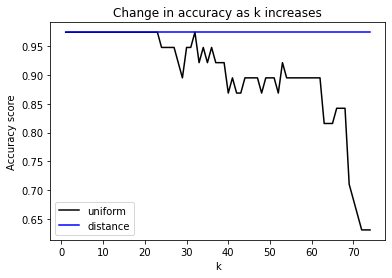

In [15]:
#plot the accuracy score depending on k for the different cases.
plt.plot(k, acc_uni, color='black', label = 'uniform')
plt.plot(k, acc_dist, color='blue', label = 'distance')
plt.legend(loc='lower left')
plt.xlabel('k')
plt.ylabel('Accuracy score')
plt.title('Change in accuracy as k increases')
plt.show()

Looking at the graph above we can see that for low values of k the performance of both the cases (uniform and distance-based weights) are good with an accuracy of approximately 97%. However, ask grows larger the accuracy drops more and more in the uniform case. In contrast, the accuracy score does not change even for large k in the distance-based weight case. This is because the points far away from the targeted data point that is now included in the classification process do not have as much of an influence on the classification of the data point as the ones that are closer, whilst for the uniform case, all these points are valued the same leading to underfitting.

## Question 4

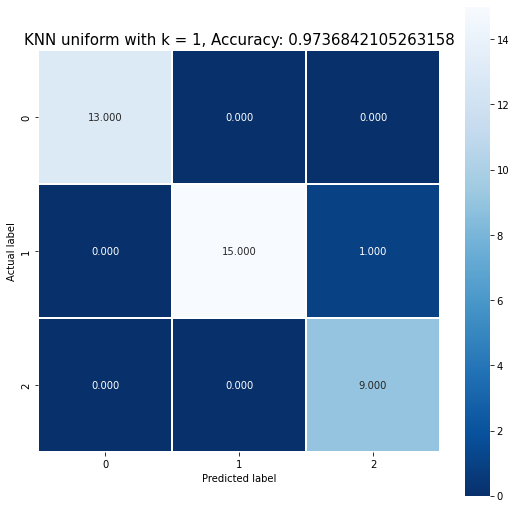

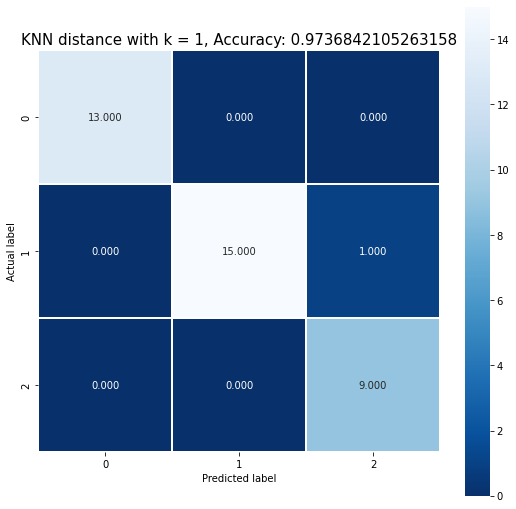

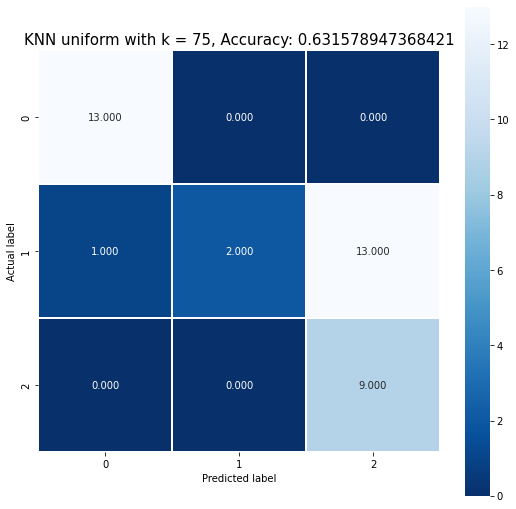

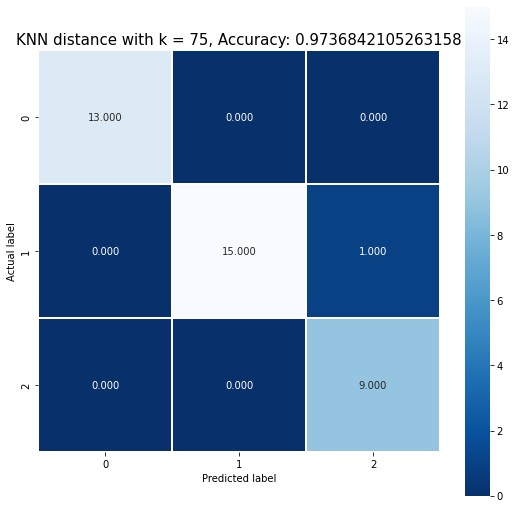

In [16]:
#generate a confusion matrix for the KNN method  and plot it
k = [1, 75]

for i in k:
    knn_uni = KNeighborsClassifier(n_neighbors=i, weights = 'uniform') 
    knn_uni.fit(x_train, y_train)
    knn_uni_pred = knn_uni.predict(x_test) #make predictions from the testing data that will be compared to the actual target value

    knn_dist = KNeighborsClassifier(n_neighbors=i, weights = 'distance') 
    knn_dist.fit(x_train, y_train)
    knn_dist_pred = knn_dist.predict(x_test) #make predictions from the testing data that will be compared to the actual target values

    #create confusion matrix for uniform case
    conf_mat_knn_uni = metrics.confusion_matrix(y_test, knn_uni_pred) 
    plt.figure(figsize=(9,9))
    sns.heatmap(conf_mat_knn_uni, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    title_uni = 'KNN uniform with k = {}, Accuracy: {}'.format(i, metrics.accuracy_score(y_test, knn_uni_pred))
    plt.title(title_uni, size = 15)
    plt.show()

    #create confusion matrix for uniform case
    conf_mat_knn_dist = metrics.confusion_matrix(y_test, knn_dist_pred) 
    plt.figure(figsize=(9,9))
    sns.heatmap(conf_mat_knn_dist, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    title_dist = 'KNN distance with k = {}, Accuracy: {}'.format(i, metrics.accuracy_score(y_test, knn_dist_pred))
    plt.title(title_dist, size = 15)
    plt.show()


As we can see when comparing the confusion matrices, on the KNN models above with the one on the logistic regression model presented under question 2, the performance of the KNN models is slightly better on this testing set for small values of k. They only miss-classified one flower while the logistic regression model wrongly labeled two. As k increases the uniform KNN model drops in performance and starts to wrongly classify a lot of label 1 as foremost label 2 and in one case as label 0. This does not happen for the distance-based model which continues to have a slightly better performance than the logistic regression model. One thing we should keep in mind though is that these conclusions are drawn from only a small test set. If we had more testing data the results could look different. We should therefore be careful of drawing conclusions on which of the distance-based KNN or logistic regression models are best only based on this testing data as these were so similar in performance.

## Question 5
It’s important to use a separate test set and sometimes a validation set in order to prevent overfitting and to get some kind of measurement on how well the model performs on new data that it has not previously seen. This evaluation score is important in order to make decisions on how much we can depend on / trust the model.

If our model specifies too much on the training data the model will perform very well on this data but might not perform very well on unseen data. To prevent this overfitting we use a separate validation set that will “notice” when the model becomes overfitted as the performance on the validation set decreases.

In order to get a performance measurement, we need to test the model on previously unseen data points that we know the right label to. This can only be achieved if we separate the entire dataset into test and training parts and keep the test set “hidden” from the model until it is testing time.
